In [ ]:
%pip install pandas numpy matplotlib seaborn scikit-learn

In [30]:
import pandas as pd

# Cargar los datos
df = pd.read_csv('../data/raw_data.csv')

df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [31]:
# Verificar valores faltantes
print(df.isnull().sum())

# Imputar valores faltantes en todas las columnas numéricas (usando la media de cada columna)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Verificar nuevamente para asegurarte de que ya no hay valores faltantes
print(df.isnull().sum())

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64
Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_12064\1178222108.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [32]:
# Generar estadísticas descriptivas
df.describe()


,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


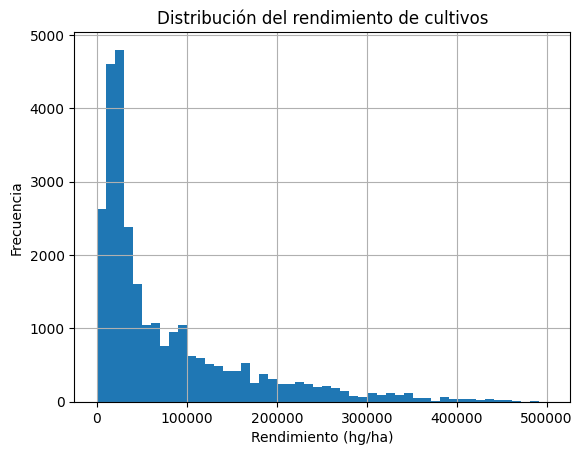

In [33]:
# Visualizar distribuciones (ejemplo con rendimiento de cultivos)
import matplotlib.pyplot as plt
df['hg/ha_yield'].hist(bins=50)
plt.title('Distribución del rendimiento de cultivos')
plt.xlabel('Rendimiento (hg/ha)')
plt.ylabel('Frecuencia')
plt.show()

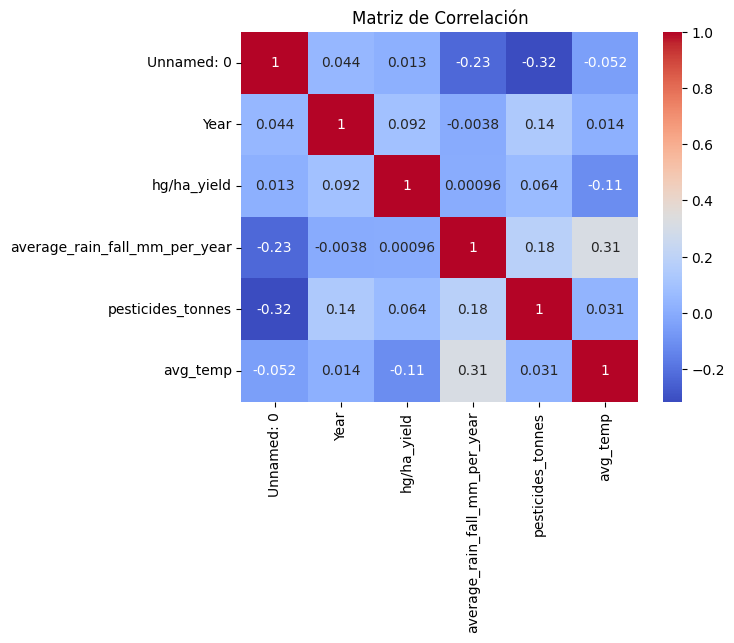

In [34]:
df_numeric = df.select_dtypes(include=['number'])
corr = df_numeric.corr()

# Visualización de la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

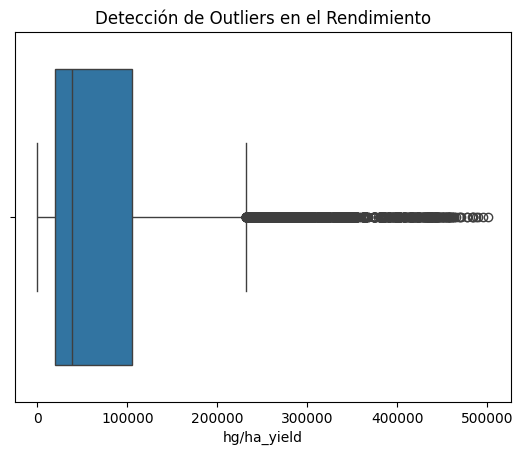

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
88,88,Albania,Potatoes,2011,242211,1485.0,1302.63,16.45
92,92,Albania,Potatoes,2012,250538,1485.0,766.25,16.70
96,96,Albania,Potatoes,2013,260110,1485.0,982.32,17.41
184,184,Algeria,Potatoes,2008,236393,89.0,11556.12,17.55
189,189,Algeria,Potatoes,2009,250764,89.0,3867.99,17.78
...,...,...,...,...,...,...,...,...
27703,27703,United Kingdom,Potatoes,2013,408993,1220.0,17673.46,8.76
27704,27704,United Kingdom,Potatoes,2013,408993,1220.0,17673.46,9.57
27705,27705,United Kingdom,Potatoes,2013,408993,1220.0,17673.46,9.57
27706,27706,United Kingdom,Potatoes,2013,408993,1220.0,17673.46,8.39


In [35]:
# Boxplot para detectar outliers
sns.boxplot(x=df['hg/ha_yield'])
plt.title('Detección de Outliers en el Rendimiento')
plt.show()

# Usar IQR para detectar outliers
Q1 = df['hg/ha_yield'].quantile(0.25)
Q3 = df['hg/ha_yield'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['hg/ha_yield'] < (Q1 - 1.5 * IQR)) | (df['hg/ha_yield'] > (Q3 + 1.5 * IQR))]
outliers

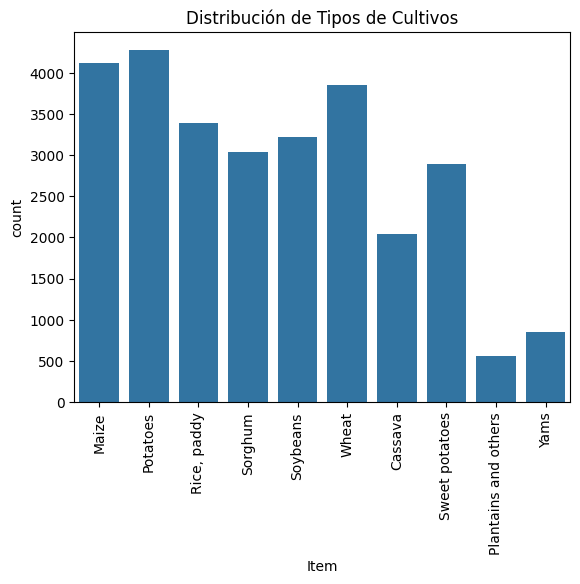

In [40]:
# Frecuencia de categorías
df['Item'].value_counts()

# Visualización de categorías
sns.countplot(x='Item', data=df)
plt.title('Distribución de Tipos de Cultivos')
plt.xticks(rotation=90)
plt.show()
